# Grafos
Un grafo es formalmente un conjunto, pareja de $(V,E)$ finito de $V$ vertices y $E /subseteq /binom{V}{2}$ de aristas.

Operaciones en u  grafo.
1. Eliminar vertices o aristas
2. Agregar vertices o aristas
3. existencia de vertices o aritas
4. Cuales ariastas y vertices hay
5. Cuales son los vecinos de un vertice



                     
0. Operacion         |Lista de incidencia |Hash de adyacencia |Matriz de adyacencia|
---------------------|--------------------|-------------------|--------------------|
1. Memoria           |$O(n + m)$          | $O(n + m)$        |$O(n^2)$            |
2. Agregar vertice   |$O(1)$              | $O(1)$            |$O(1)$              |
3. Eliminar vertice  |$O(n + m)$          | $O(n) $           |$O(1)$              |
4. Agregar arista    |$O(n)$              | $O(1)$            |$O(n^2)$            |
5. Agregar arista    |$O(m)$              | $O(1)$            |$O(n^2)$            |
6. Consultar vertice |$O(n)$              | $O(1)$            |$O(1)$              |
7. Consultar arista  |$O(m)$              | $O(1)$            |$O(1)$              |
8. Iterar vertices   |$O(n)$              | $O(n)$            |$O(n)$              |
9. Iterar aristas    |$O(m)$              | $O(n + m)$        |$O(n^2)$            |
10. Iterar vecinos    |$O(n + m)$          | $O(n)$            |$O(n)$              |


In [0]:
G = {
    'A': {'B', 'C'} ,
    'B': {'A','C'},
    'C': {},
    'D': {}
}

In [0]:
import networkx as nx
import random
import math
import matplotlib as plt
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
G = nx.Graph()

In [0]:
G.add_nodes_from(list('ABCD'))
G.nodes


NodeView(('A', 'B', 'C', 'D'))

In [0]:
G.add_edges_from([('A','C'), ('B','A'),('B','C'), ('B', 'D')])
G.edges

EdgeView([('A', 'C'), ('A', 'B'), ('B', 'C'), ('B', 'D')])

In [0]:
nx.draw(G)

C:\Users\Fredy\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [0]:
def grafo(n: int):
    
    #nodos = G.add_nodes_from(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
    
    aristas = []
    for n in range(n):
        for m in range(n):
            aristas.append((n,m))
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(aristas)
    return G  
        

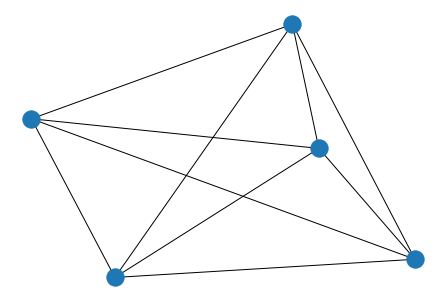

In [0]:
nx.draw(grafo(5))

In [0]:
def biGrafo(n1: int, n2: int):
    aristas = []
    for n in range(n1):
        for m in range(n1, n1 + n2):
            aristas.append((n,m))
    G = nx.Graph()
    G.add_nodes_from(range(n1))
    G.add_nodes_from(range(n1, n1 + n2))
    G.add_edges_from(aristas)
    return G  
    

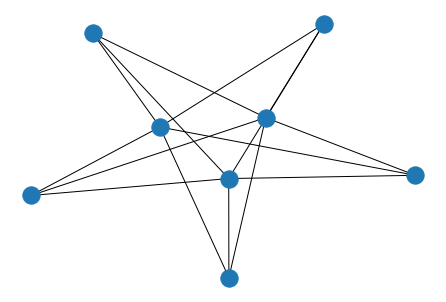

In [0]:
nx.draw(biGrafo(5,3))

In [0]:
def randomGrafo(n: int, p: float):
    aristas = []
    
    for n in range(n):
        for m in range(n):
            if(random.random() < p):
                aristas.append((n,m))
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(aristas)
    return G 
    

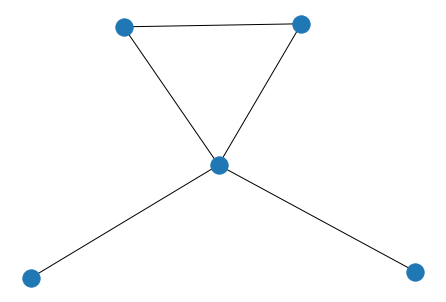

In [0]:
nx.draw(randomGrafo(5, 0.5))

In [4]:
def aristas(str1, str2):

    count = 0
    for a,b in zip(str1, str2):
        if(a!=b):
            count = count + 1
    if count==1:
        return True
    else:
        return False

aristas('00010', '00110')

    

True

In [0]:

def hyper_cube(dim):
    G = nx.Graph()
    #cambio = []
    edges = []
    nodos = []
    
    tam = '{0:0'+str(dim)+'b}'
    for i in range(pow(2,dim)):
        valor = str(tam.format(i))
        nodos.append(valor)
    
    cadena = nodos[0]
    for i in range(len(nodos)):
        for j in range(len(nodos)-1):
            var1 = nodos[i]
            var2 = nodos[j]
            var = aristas(var1, var2)
            if(var):
                edges.append((var1, var2))
    #print(nodos)
    G.add_nodes_from(nodos)
    G.add_edges_from(edges)
    return G
    
    
    
    

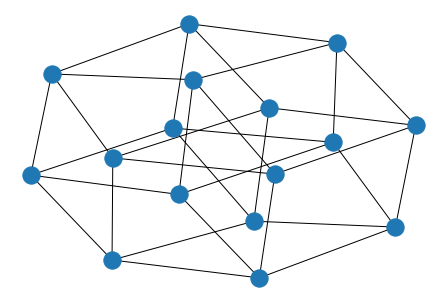

In [8]:

grafo = hyper_cube(4)
nx.draw(grafo)

#print(aristas('101011', '101110'))


n = |V|

m = |E|

O(n + m) complejidad para func esConexco

In [0]:
def esConexo(G : nx.Graph()) -> bool:
    # recorrido en anchura
    # buscar un camino desde el nodo inicial a la raiz y del nodo raiz al nodo final
    def visitar(u):
        nonlocal tiempo
        desc[u] = tiempo
        tiempo += 1
        for v in G.neighbors(u):
            if v not in desc:
                visitar(v)
    raiz = next(iter(G.nodes))
    tiempo, desc = 0 , {}
    visitar(raiz)
    
    for u in G.nodes:
        if u not in desc:
            return False
    return True
    
    

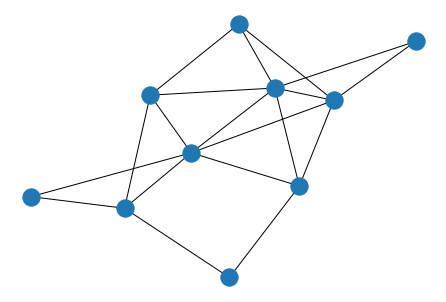

In [0]:
G = randomGrafo(10, 0.3)
nx.draw(G)

In [0]:
esConexo(G)

False

conexos / total de simulaciones

G(num_nodos, prob, k-simulaciones)

In [0]:
def prob_conexa(n, prob, ksimul):
    
    count = []
    for i in range(ksimul):
        grafo = randomGrafo(n, prob)
        valor = esConexo(grafo)
        if(valor):
            count.append(1)
    media = len(count) / ksimul

    return(media)
    

In [0]:
prob_conexa(10, .2 , 200)





0.215

In [0]:
def prob_conexa(n, p, k):
    grafos= (nx.erdos_renyi_graph(n, p) for _ in range(k))
    conexos = map(nx.is_connected, grafos)
    return sum(conexos)/ k
    
    

In [0]:
prob_conexa(10, .2, 200)

0.26

In [0]:
np.linspace(3, 7, 10)


array([3.        , 3.44444444, 3.88888889, 4.33333333, 4.77777778,
       5.22222222, 5.66666667, 6.11111111, 6.55555556, 7.        ])

In [0]:
for p in np.linspace(0, 1, 50):    
    print(p, prob_conexa(10, p, 200))

0.0 0.0
0.02040816326530612 0.0
0.04081632653061224 0.0
0.061224489795918366 0.0
0.08163265306122448 0.0
0.1020408163265306 0.015
0.12244897959183673 0.03
0.14285714285714285 0.075
0.16326530612244897 0.12
0.18367346938775508 0.155
0.2040816326530612 0.205
0.22448979591836732 0.315
0.24489795918367346 0.39
0.26530612244897955 0.525
0.2857142857142857 0.575
0.3061224489795918 0.69
0.32653061224489793 0.79
0.3469387755102041 0.845
0.36734693877551017 0.82
0.3877551020408163 0.925
0.4081632653061224 0.93
0.42857142857142855 0.925
0.44897959183673464 0.955
0.4693877551020408 0.965
0.4897959183673469 0.97
0.5102040816326531 0.99
0.5306122448979591 0.99
0.5510204081632653 0.99
0.5714285714285714 0.995
0.5918367346938775 0.99
0.6122448979591836 1.0
0.6326530612244897 1.0
0.6530612244897959 1.0
0.673469387755102 1.0
0.6938775510204082 1.0
0.7142857142857142 1.0
0.7346938775510203 1.0
0.7551020408163265 1.0
0.7755102040816326 1.0
0.7959183673469387 1.0
0.8163265306122448 1.0
0.836734693877551 1

C:\Users\Fredy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


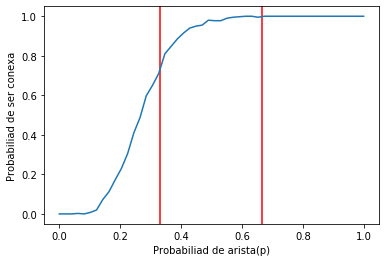

In [0]:
x = np.linspace(0, 1 , 50)
n = 10
k = 400
y = [prob_conexa(n, p, k) for p in x]

p_star = (math.log2(n)/n)


fig, ax = plt.subplots()
ax.set_xlabel('Probabiliad de arista(p)')
ax.set_ylabel('Probabiliad de ser conexa')
ax.axvline(p_star, color='red')
ax.axvline(2*p_star, color='red')
ax.plot(x, y)

fig.show()

# y la probabilidad de la arista
# probabilidad de ser conexa
